In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

<ipython-input-4-b63dee795c74>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
from pyodide.http import pyfetch

In [6]:
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())

In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [8]:
await download (file_path, 'usedcars.csv')

In [9]:
file_name = 'usedcars.csv'

In [10]:
df = pd.read_csv(file_name)
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [11]:
headers =  ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [12]:
df.columns = headers

In [13]:
print(df.columns) 

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [15]:
df.replace('?', np.nan, inplace = True)

In [16]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [18]:
import matplotlib.pylab as plt

In [19]:
missing_data = df.isnull
missing_data

<bound method DataFrame.isnull of      symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            1               NaN  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2               NaN         audi       gas        std   
..         ...               ...          ...       ...        ...   
199         -1                95        volvo       gas        std   
200         -1                95        volvo       gas      turbo   
201         -1                95        volvo       gas        std   
202         -1                95        volvo    diesel      turbo   
203         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd    

In [20]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

<class 'AttributeError'>: 'function' object has no attribute 'columns'

In [21]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [22]:
df["normalized-losses"].replace(np.nan, avg_norm_loss)

0      122.0
1      122.0
2        164
3        164
4      122.0
       ...  
199       95
200       95
201       95
202       95
203       95
Name: normalized-losses, Length: 204, dtype: object

In [23]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print(avg_bore)

3.3290499999999996


In [24]:
 df['bore'].replace(np.nan, avg_bore)

0      3.47
1      2.68
2      3.19
3      3.19
4      3.19
       ... 
199    3.78
200    3.78
201    3.58
202    3.01
203    3.78
Name: bore, Length: 204, dtype: object

question 1_replace NaN in "stroke" column with the mean value.

In [25]:
avg_stroke = df['stroke'].astype('float').mean(axis = 0)
print("Avarage of stroke:", avg_stroke)

Avarage of stroke: 3.2582999999999993


In [26]:
df['stroke'].replace(np.nan, avg_stroke)

0      2.68
1      3.47
2      3.40
3      3.40
4      3.40
       ... 
199    3.15
200    3.15
201    2.87
202    3.40
203    3.15
Name: stroke, Length: 204, dtype: object

Question 1a_Calculate the mean value for the "horsepower" column

In [27]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print('Avearge of horsepower is:', avg_horsepower)

Avearge of horsepower is: 104.22277227722772


In [28]:
df['horsepower'].replace(np.nan, avg_horsepower)

0      111
1      154
2      102
3      115
4      110
      ... 
199    114
200    160
201    134
202    106
203    114
Name: horsepower, Length: 204, dtype: object

Qustion1b_Calculate the mean value for "peak-rpm" column¶

In [29]:
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print('the average of peakrpm is:', avg_peakrpm)

the average of peakrpm is: 5125.990099009901


In [30]:
df['peak-rpm'].replace(np.nan, avg_peakrpm)

0      5000
1      5000
2      5500
3      5500
4      5500
       ... 
199    5400
200    5300
201    5500
202    4800
203    5400
Name: peak-rpm, Length: 204, dtype: object

In [31]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

In [32]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [33]:
df['num-of-doors'].replace(np.nan, 'four')

0       two
1       two
2      four
3      four
4       two
       ... 
199    four
200    four
201    four
202    four
203    four
Name: num-of-doors, Length: 204, dtype: object

In [34]:
df.dropna(subset=['price'], axis =0, inplace = True )

In [35]:
df.reset_index(drop=True, inplace=True)

In [36]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [37]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<class 'ValueError'>: cannot convert float NaN to integer

In [38]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [39]:
df['city-L/100km'] = 235/df["city-mpg"]

In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,12.368421


DATA NORMALIZATIO

In [41]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

(array([180.,   0.,  20.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

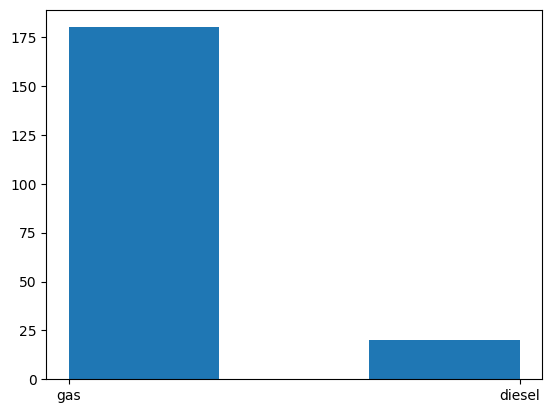

In [43]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["fuel-type"], bins = 3)


In [44]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km'],
      dtype='object')

In [45]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head

<bound method NDFrame.head of      diesel    gas
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
..      ...    ...
195   False   True
196   False   True
197   False   True
198    True  False
199   False   True

[200 rows x 2 columns]>

In [46]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [47]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [49]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000,21,27,16500,11.190476,False,True
1,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000,19,26,16500,12.368421,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500,24,30,13950,9.791667,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500,18,22,17450,13.055556,False,True
4,2,NaN,audi,std,two,sedan,fwd,front,99.8,0.851994,...,3.40,8.5,110,5500,19,25,15250,12.368421,False,True


In [50]:
df['aspiration'].value_counts()

aspiration
std      164
turbo     36
Name: count, dtype: int64

In [51]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.head

<bound method NDFrame.head of        std  turbo
0     True  False
1     True  False
2     True  False
3     True  False
4     True  False
..     ...    ...
195   True  False
196  False   True
197   True  False
198  False   True
199  False   True

[200 rows x 2 columns]>

In [52]:
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [55]:
df = pd.concat([df, dummy_variable_2], axis = 1)

In [56]:
df.drop('aspiration', axis = 1, inplace = True)

In [57]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,NaN,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000,21,27,16500,11.190476,False,True,True,False
1,1,NaN,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000,19,26,16500,12.368421,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500,24,30,13950,9.791667,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500,18,22,17450,13.055556,False,True,True,False
4,2,NaN,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,110,5500,19,25,15250,12.368421,False,True,True,False
